# Imports and Data Preparation

Comparisions for RF-GAP
    - MALI
    - KEMA (MAT-LAB); wait


Some Ideas:
- Since this method requires labels, we could classiy different domains based on the labels. For example, if we have a data set of people sick with Creutzfeld-Jakob discease and the other domain is people who are sick with alzheimers. 

In [39]:
from mashspud import MASH
import numpy as np
import pandas as pd
import Main.test_manifold_algorithms as tma
from mashspud import SPUD
from Helpers.rfgap import RFGAP
import matplotlib.pyplot as plt
from Helpers.Pipeline_Helpers import rf_test_proximities

#DC is short for data class
dc = tma.test_manifold_algorithms(csv_file="Hydrodynamics.csv", split = "distort", percent_of_anchors= [0.2], verbose = 4, random_state= 42)

MDS initialized with 6 components

 
 
---------------------------       Initalizing class with Hydrodynamics.csv data       ---------------------------

The knn values are: (2, 9, 16, 23, 30, 37, 44, 51, 58, 65)


In [44]:
def use_rf_proximities(self, tuple):
    """Creates RF proximities similarities
    
        tuple should be a tuple with position 0 being the data and position 1 being the labels"""
    #Initilize Class
    rf_class = RFGAP(prediction_type="regression", y=tuple[1], prox_method="rfgap", matrix_type= "dense", triangular=False, non_zero_diagonal=False)

    #Fit it for Data A
    rf_class.fit(tuple[0], y = tuple[1])

    #Get promities
    dataA = rf_class.get_proximities()

    #Reset len_A and other varables
    if self.len_A == 2:
        self.len_A = len(tuple[0]) 

        #Change known_anchors to correspond to off diagonal matricies -- We have to change this as its dependent upon A
        self.known_anchors_adjusted = np.vstack([self.known_anchors.T[0], self.known_anchors.T[1] + self.len_A]).T

    elif self.len_B == 2:
        self.len_B = len(tuple[0])

    #Scale it and check to ensure no devision by 0
    if np.max(dataA[~np.isinf(dataA)]) != 0:

      dataA = (dataA - dataA.min()) / (dataA[~np.isinf(dataA)].max() - dataA.min()) 

    #Reset inf values
    dataA[np.isinf(dataA)] = 0

    return 1 - dataA

# Applying RF GAP for SPUD

In [45]:
#Initialize SPUD Class
spud_class = SPUD(distance_measure_A = use_rf_proximities, distance_measure_B= use_rf_proximities, knn = 10, verbose = 4)

#Fit SPUD
spud_class.fit(dataA = (dc.split_A, dc.labels), dataB = (dc.split_B, dc.labels), known_anchors = dc.anchors[:3])

Time it took to compute SGDM:  0.99
Time it took to execute graphtools.Graph functions:  0.19
Time it took to execute merge_graphs function:  0.0
Time it took to execute get_block function:  0.09
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


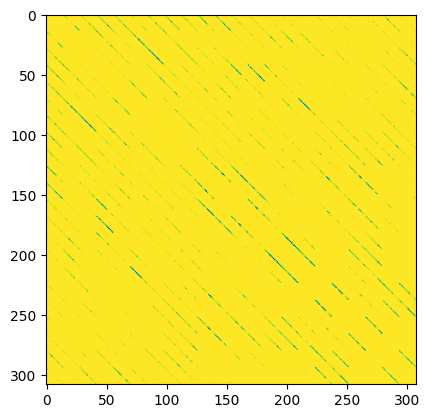

In [46]:
plt.imshow(spud_class.block[:spud_class.len_A, :spud_class.len_A])


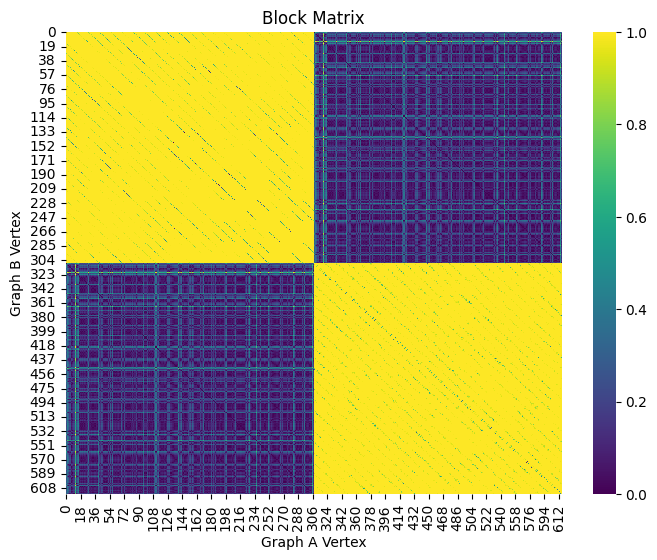

In [47]:
spud_class.plot_heat_map()

Time it took to calculate the embedding: 5.45
RF-GAP score is R^2
Calculating the R squared score.
RF score on full embedding: -0.018642861722413695
Cross Embedding score: -0.15401504653359344
Fraction of Samples Closest to thier Match: 0.006946786979254512


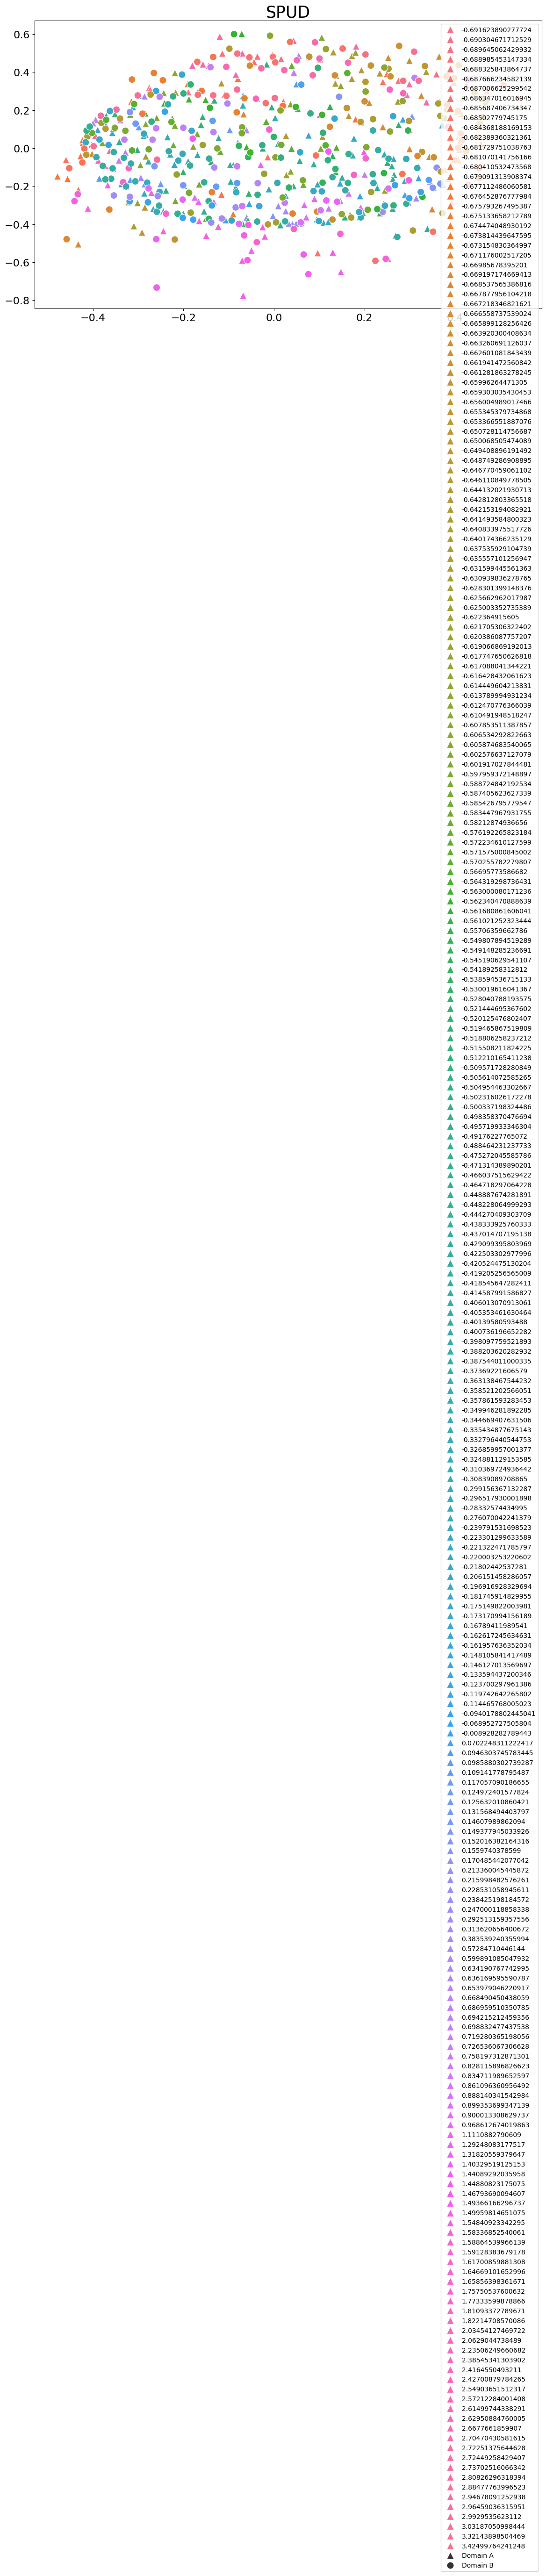

Time it took complete the plots: 3.99


In [48]:
spud_class.plot_emb(labels = dc.labels_doubled, show_anchors = False, show_lines = False)

# Applying RF GAP for MASH

In [7]:
#Initialize SPUD Class
mash_class = MASH(t = -1, distance_measure_A = use_rf_proximities, distance_measure_B= use_rf_proximities, knn = 4, verbose = 0, DTM = "log")

#Fit SPUD
mash_class.fit(dataA = (dc.split_A, dc.labels), dataB = (dc.split_B, dc.labels), known_anchors = dc.anchors[12:15])

Cross Embedding score: 0.6658291457286432
Fraction of Samples Closest to thier Match: 0.3152950683063559
RF score trained on full Embedding: 0.914572864321608


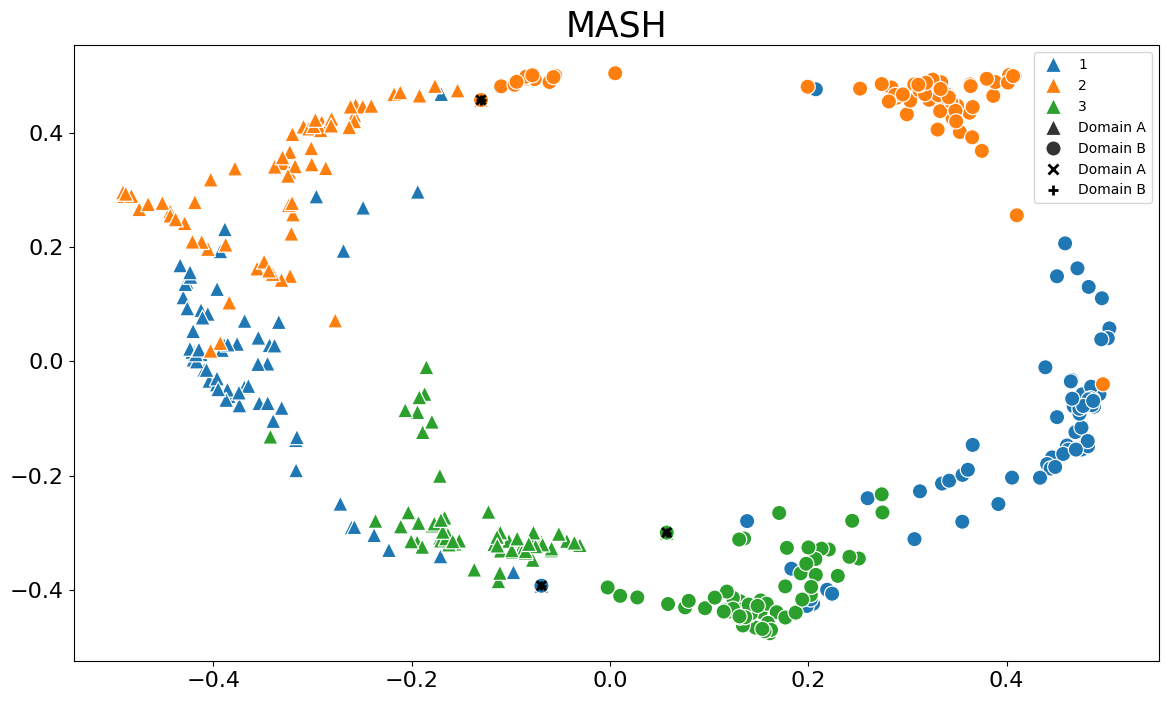

In [8]:
mash_class.plot_emb(labels = dc.labels_doubled, show_anchors = True, show_lines = False)

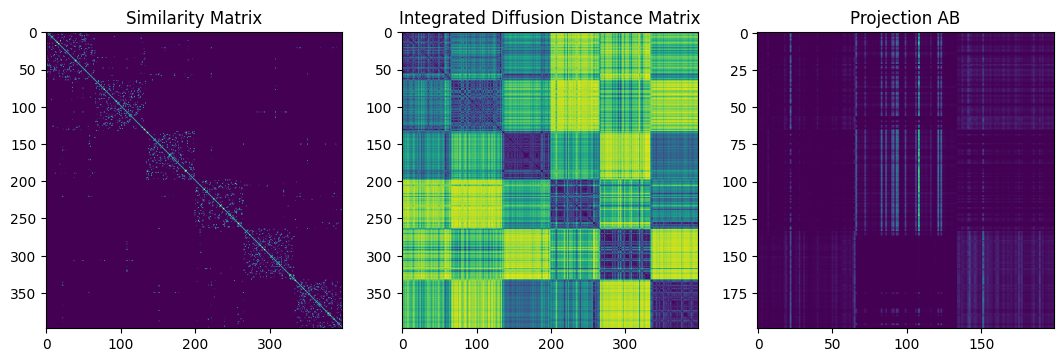

In [9]:
mash_class.plot_heat_maps()

Time Data Below
 Time it took to execute the graph for domain A:  0.07844
 Time it took to compute kernal A:  6e-05
 Time it took to execute the graph for domain B:  0.07261
 Time it took to compute kernal B:  6e-05


 Time it took to compute merge_graphs function:  0.08261
 Time it took to compute similarity_matrix function:  0.00084
Using optimal t value of 29
 Time it took to compute diffusion process:  0.15783
Fit process finished. We recommend calling optimize_by_creating_connections.


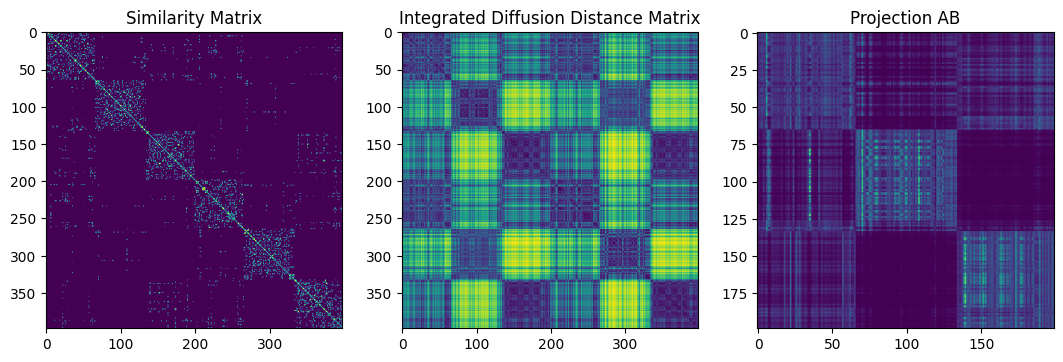

In [10]:
#Initialize SPUD Class
mash_class2 = MASH(knn = 8, verbose = 3, DTM = "log")
mash_class2.fit(dataA = dc.split_A, dataB = dc.split_B, known_anchors = dc.anchors[:15])
mash_class2.plot_heat_maps()

Time it took to calculate the embedding: 0.90971
RF-GAP score is accuracy
Calculating the classification Score.
Cross Embedding score: 0.8693467336683417
Fraction of Samples Closest to thier Match: 0.10133582485290776
RF score trained on full Embedding: 0.907035175879397


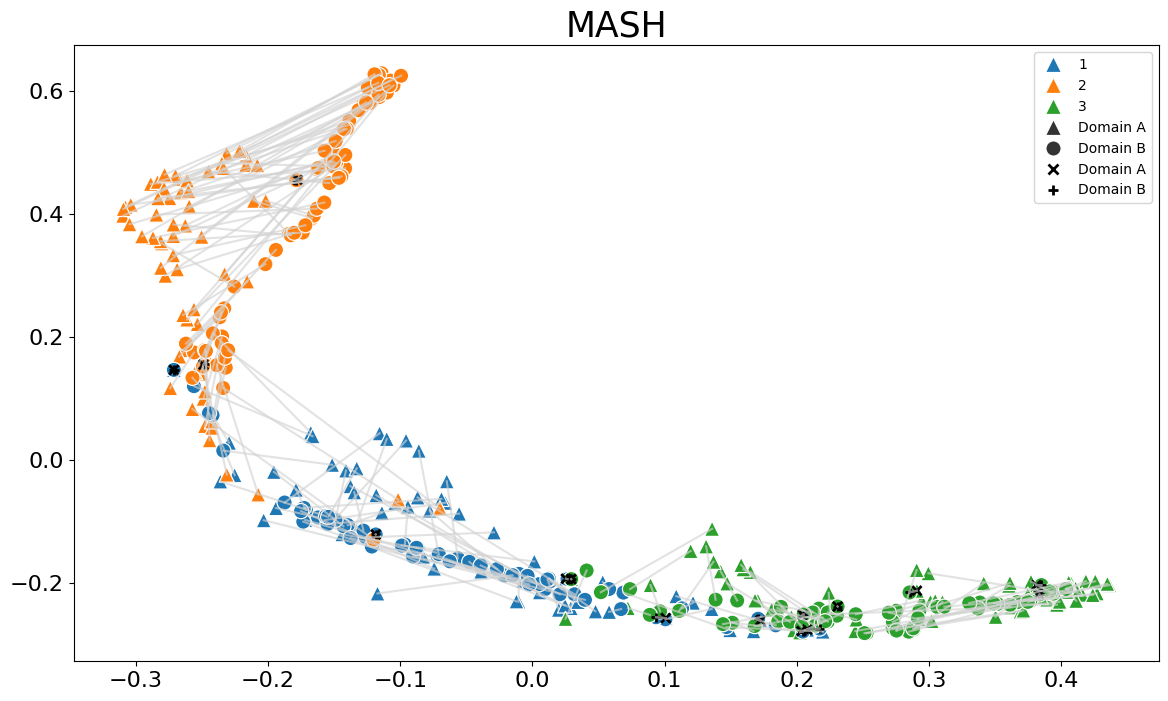

In [11]:
mash_class2.plot_emb(labels = dc.labels_doubled)

In [12]:
mash_class.optimize_by_creating_connections(epochs=3, connection_limit= 30, threshold = 0.9, hold_out_anchors=dc.anchors[4:8])

True

Cross Embedding score: 0.6658291457286432
Fraction of Samples Closest to thier Match: 0.271356783919598
RF score trained on full Embedding: 0.9195979899497487


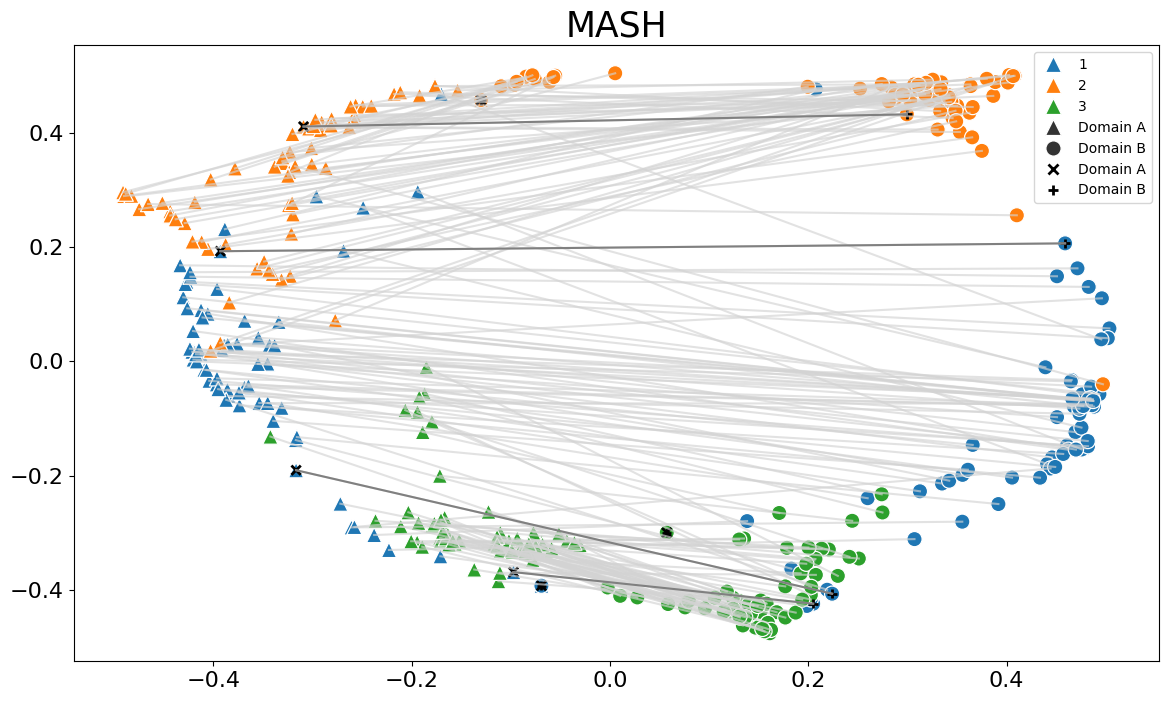

In [13]:
mash_class.plot_emb(labels = dc.labels_doubled)

# Using RF-Extend

### MASH

In [14]:
from Helpers.Pipeline_Helpers import *
from mashspud import MASH
import numpy as np
import pandas as pd
import Main.test_manifold_algorithms as tma
from mashspud import SPUD
from Helpers.rfgap import RFGAP
import matplotlib.pyplot as plt

In [15]:
dc = tma.test_manifold_algorithms(csv_file="iris.csv", split = "random", percent_of_anchors= [0.2], verbose = 4, random_state= 42)

MDS initialized with 2 components

 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


In [16]:
mash_class = MASH(distance_measure_A = get_rf_proximites, distance_measure_B= get_rf_proximites, knn = 6, t = -1, verbose = 3, DTM = "log")
mash_class.fit(dataA = (dc.split_A, dc.labels), dataB = (dc.split_B, dc.labels), known_anchors = dc.anchors[:10])

Time Data Below


 Time it took to execute SGDM for domain A:  0.35123
 Time it took to execute the graph for domain A:  0.00222
 Time it took to execute SGDM for domain B:  0.3472
 Time it took to execute the graph for domain B:  0.00198
 Time it took to compute merge_graphs function:  0.09428
 Time it took to compute similarity_matrix function:  0.00027
Using optimal t value of 8
 Time it took to compute diffusion process:  0.11995
Fit process finished. We recommend calling optimize_by_creating_connections.


In [17]:
mash_class.get_scores(labels = dc.labels_doubled)

Time it took to calculate the embedding: 0.69154
RF-GAP score is accuracy
Calculating the classification Score.


(0.26093333333333335, 0.8733333333333333, 0.9366666666666666)

In [18]:
from sklearn.model_selection import train_test_split

#Initialize SPUD Class
mash_class = MASH(distance_measure_A = rf_test_proximities, distance_measure_B= rf_test_proximities, knn = 6, t = -1, verbose = 3, DTM = "log")

X_A_train, X_A_test, y_A_train, y_A_test = train_test_split(dc.split_A, dc.labels, test_size=0.2, random_state=42)
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(dc.split_B, dc.labels, test_size=0.2, random_state=42)
labels_doubled = np.hstack((y_A_train, y_A_test, y_B_train, y_B_test))

#Fit SPUD
mash_class.fit(dataA = (X_A_train, X_A_test, y_A_train), dataB = (X_B_train, X_B_test, y_B_train), known_anchors = dc.anchors[:10])

Time Data Below
 Time it took to execute SGDM for domain A:  0.35273
 Time it took to execute the graph for domain A:  0.00207
 Time it took to execute SGDM for domain B:  0.35363
 Time it took to execute the graph for domain B:  0.00201
 Time it took to compute merge_graphs function:  0.09073
 Time it took to compute similarity_matrix function:  0.00044
Using optimal t value of 8
 Time it took to compute diffusion process:  0.07287
Fit process finished. We recommend calling optimize_by_creating_connections.


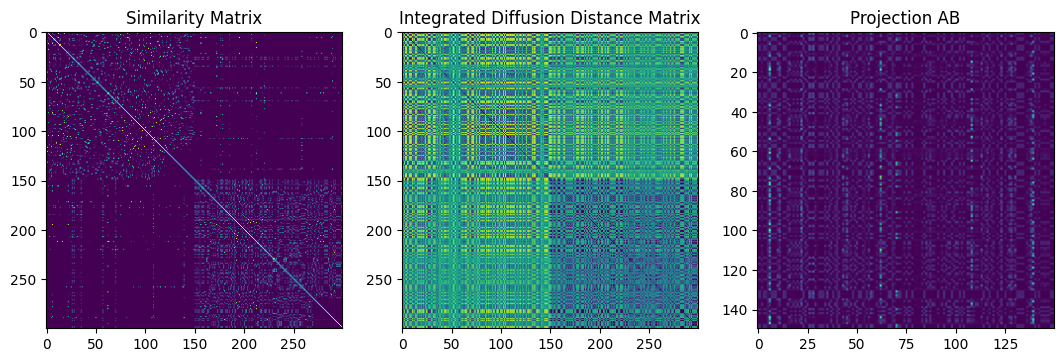

In [19]:
mash_class.plot_heat_maps()

Time it took to calculate the embedding: 0.48446
RF-GAP score is accuracy
Calculating the classification Score.
Cross Embedding score: 1.0
Fraction of Samples Closest to thier Match: 0.23844444444444443
RF score trained on full Embedding: 1.0


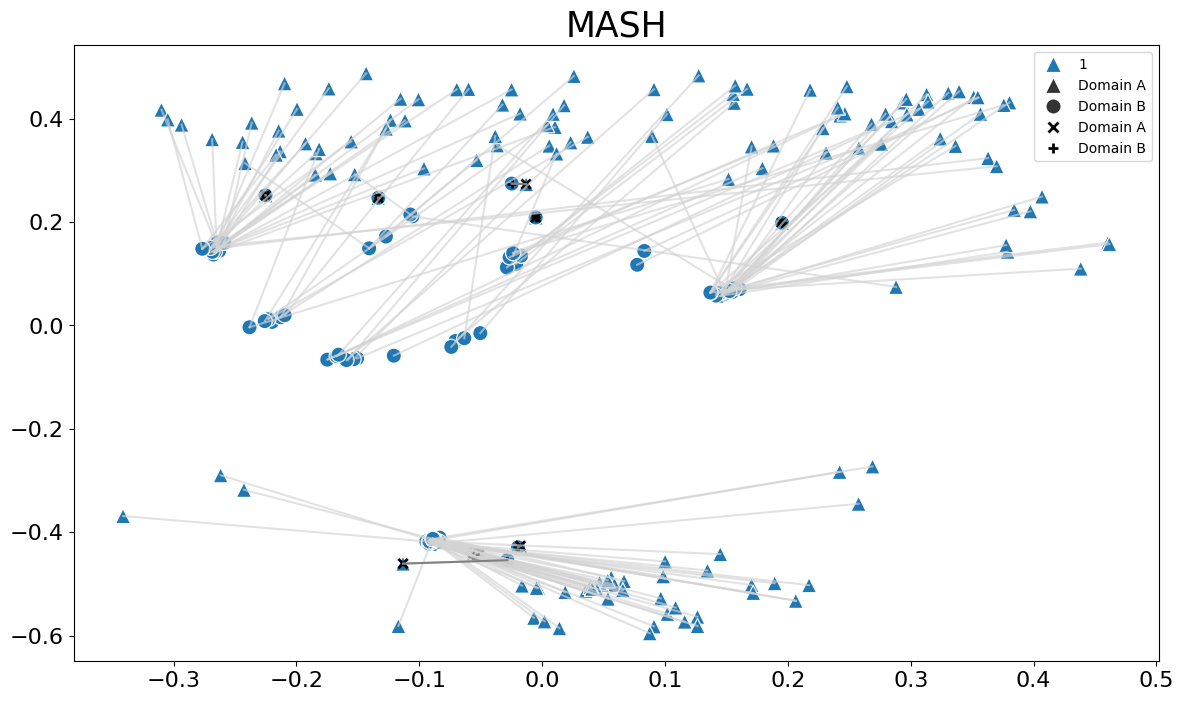

In [20]:
mash_class.plot_emb(labels=np.ones_like(dc.labels_doubled))

RF-GAP score is accuracy
Calculating the classification Score.
Cross Embedding score: 0.8033333333333333
Fraction of Samples Closest to thier Match: 0.23844444444444443
RF score trained on full Embedding: 0.85


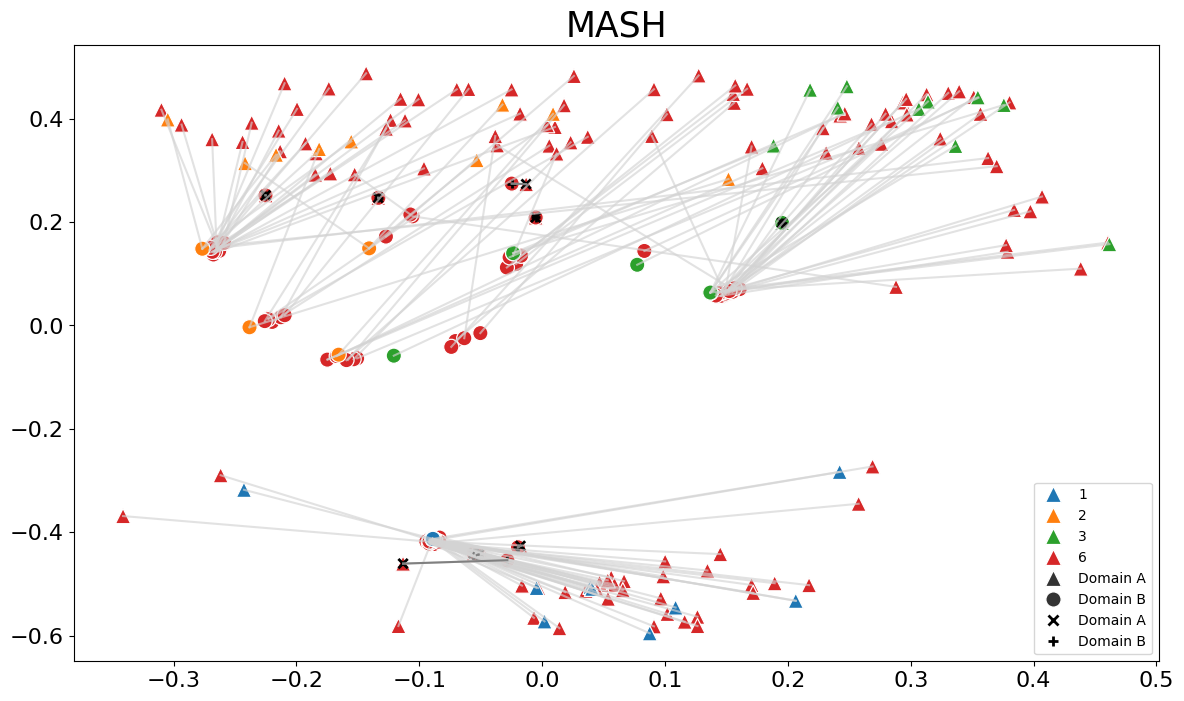

In [21]:
labels_greyed = np.hstack((np.ones_like(y_A_train)+5, y_A_test, np.ones_like(y_B_train)+5, y_B_test))
mash_class.plot_emb(labels = labels_greyed)

### Spud

In [22]:
from sklearn.model_selection import train_test_split

#Initialize SPUD Class
spud_class = SPUD(distance_measure_A = rf_test_proximities, distance_measure_B= rf_test_proximities, knn = 3, verbose = 4)

X_A_train, X_A_test, y_A_train, y_A_test = train_test_split(dc.split_A, dc.labels, test_size=0.2, random_state=42)
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(dc.split_B, dc.labels, test_size=0.2, random_state=42)
labels_doubled = np.hstack((y_A_train, y_A_test, y_B_train, y_B_test))

#Fit SPUD
spud_class.fit(dataA = (X_A_train, X_A_test, y_A_train), dataB = (X_B_train, X_B_test, y_B_train), known_anchors = dc.anchors[:10])

Time it took to compute SGDM:  1.05
Time it took to execute graphtools.Graph functions:  0.16
Time it took to execute merge_graphs function:  0.0
Time it took to execute get_block function:  0.01
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


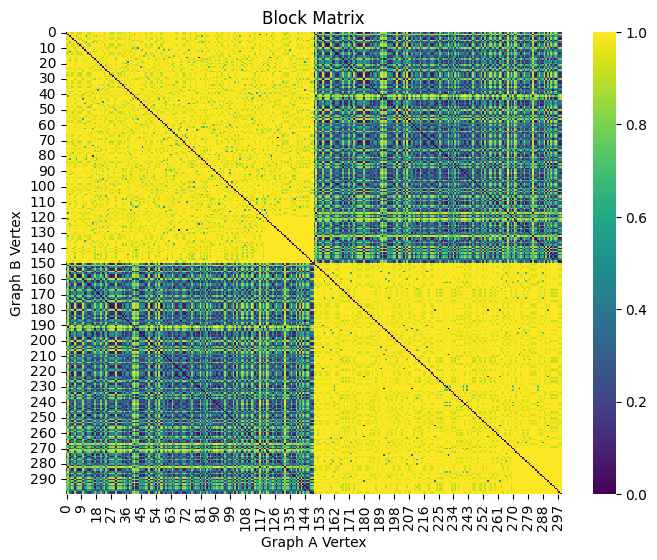

In [23]:
spud_class.plot_heat_map()

Time it took to calculate the embedding: 1.21
RF-GAP score is accuracy
Calculating the classification Score.
RF score on full embedding: 0.95
Cross Embedding score: 0.9533333333333334
Fraction of Samples Closest to thier Match: 0.0006666666666666668


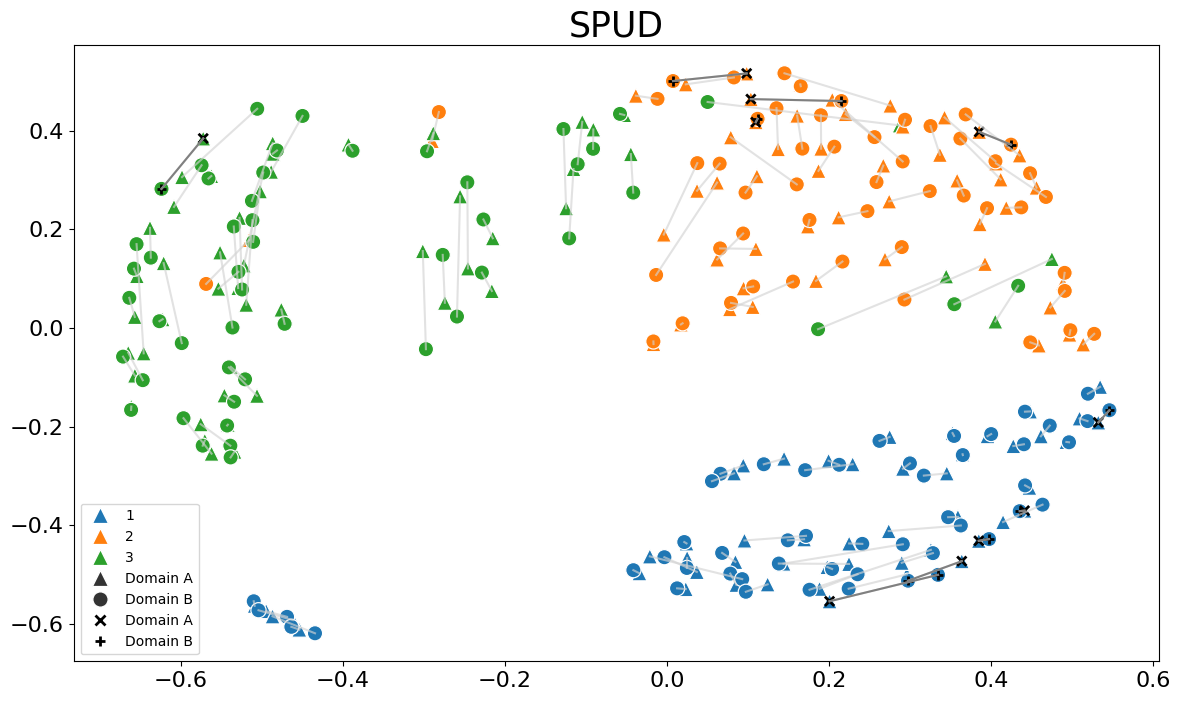

Time it took complete the plots: 0.7


In [24]:
spud_class.plot_emb(labels = labels_doubled)

RF-GAP score is accuracy


Calculating the classification Score.
RF score on full embedding: 0.7633333333333333
Cross Embedding score: 0.78
Fraction of Samples Closest to thier Match: 0.0006666666666666668


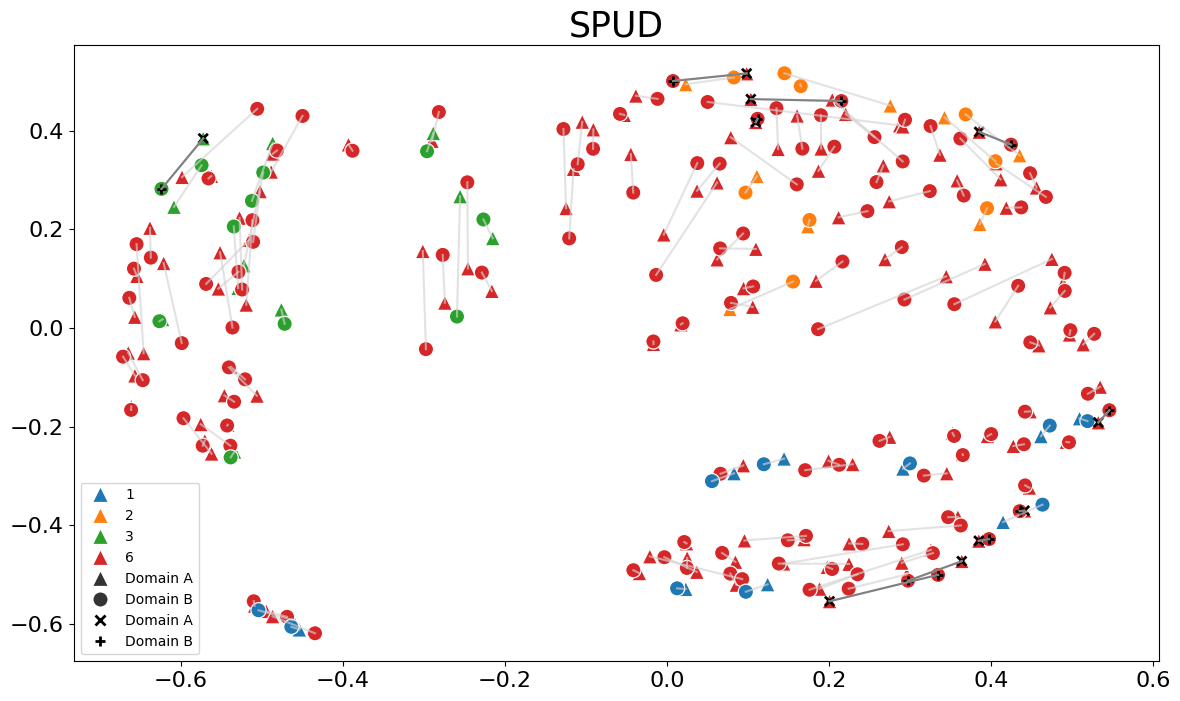

Time it took complete the plots: 0.71


In [25]:
labels_greyed = np.hstack((np.ones_like(y_A_train)+5, y_A_test, np.ones_like(y_B_train)+5, y_B_test))
spud_class.plot_emb(labels = labels_greyed)